### Hypothesis Testing Exercises

In [133]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt


For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### Has the network latency gone up since we switched internet service providers?

Null Hypothesis: Latency has no relationship to service providers.
Alternative Hypothesis: Latency has increased since service provider switch.

True Positive: There is a lack of evidence to prove that latency has no relationship to service providers.
True Negative: Latency indeed has no relationship to service providers.
Type I Error: We assume latency increases because we switched service providers when there is no relationship.
Type II Error: We assume there is no relationship between latency and service providers when there is a relationship between latency and internet providers.

#### Is the website redesign any good?

Null Hypothesis: Website redesigns bear no impact on internet traffic.
Alternative Hypothesis: Website redesigns lead to increased internet traffic.

True Positive: Website redesigns do not bear an impact on internet traffic.
True Negative: Website redesigns do bear no impact on internet traffic.
Type I Error: We assume website redesigns bear an impact on internet traffic when in reality they do not.
Type II Error: We accept taht website redesigns bear no impact on internet traffic when they do.

#### Is our television ad driving more sales?

Null Hypothesis: Television ads make no difference in driving more sales.
Alternative Hypothesis: Television ads increase sales.

True Positive: It can't be proven tat television don't make a difference in driving sales.
True Negative: Television ads don't make a difference in driving more sales.
Type I Error: We assume television ads make a difference in driving more sales when they don't.
Type II Error: We assume television ads make no difference in driving sales when they don't.

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:
office_one_mean = 90
office_one_sample = 40
office_one_std_dev = 15
office_two_mean = 100
office_two_sample = 50
office_two_std_dev = 20

In [ ]:

# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend();

**Set Hypothesis**

$H_{0}$: Average time it takes to sell home is the same between office one and office two

$H_{a}$: Average time it takes to sell home is not the same between office one and office two  

**Set Alpha**

In [ ]:
alpha = 0.05

In [ ]:
office_one_var = office_one_std_dev * office_one_std_dev
office_two_var = office_two_std_dev * office_two_std_dev
office_one_var, office_two_var

In [ ]:
t, p = stats.ttest_ind_from_stats(office_one_mean, office_one_std_dev, office_one_sample, office_two_mean, office_two_std_dev, office_two_sample, equal_var = False)

t, p, alpha                       

In [ ]:
if p <  alpha:
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

Load the mpg dataset and use it to answer the following questions:

 - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
from pydataset import data
mpg = data('mpg')

In [ ]:
mpg.head()

In [ ]:
mpg.info()

In [ ]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

In [ ]:
cars_08 = mpg[mpg.year == 2008].avg_mpg 
cars_99 = mpg[mpg.year == 1999].avg_mpg 

In [ ]:
cars_08.hist()

In [ ]:
cars_99.hist()

**Hypothesis**

$H_{0}$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_{a}$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: sorta
- Independent: yes!
- Variance: No

In [ ]:
cars_08.var(), cars_99.var()

In [ ]:
t, p = stats.ttest_ind(cars_08, cars_99, equal_var = False)

t, p, alpha

In [ ]:
if p <  alpha:
    print("We reject the null hypothesis")
else: 
    print(" We fail to reject the null hypothesis")

In [ ]:
cars_08.mean(), cars_99.mean()

In [ ]:
plt.hist([cars_99, cars_08], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right");

 - Are compact cars more fuel-efficient than the average car?

In [ ]:
compact_cars = mpg[mpg['class'] == 'compact'].avg_mpg

In [ ]:
avg_mpg_cars = mpg.avg_mpg

In [ ]:
compact_cars.mean(), avg_mpg_cars.mean()

In [ ]:
compact_cars.hist()

In [ ]:
avg_mpg_cars.hist()

**Hypothesis**

$H_{0}$: Average fuel efficiency in compact cars <= the average fuel efficiency of the average car

$H_{a}$: Average fuel efficiency in compact cars > the average fuel efficiency of the average car

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes
- Independent: yes!
- Variance: No

In [ ]:
alpha = 0.05

In [ ]:
compact_cars.var(), avg_mpg_cars.var()

In [ ]:
t, p = stats.ttest_1samp(compact_cars, avg_mpg_cars.mean())

t, p/2, alpha

In [ ]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

 - Do manual cars get better gas mileage than automatic cars?

In [ ]:
mpg.head(1)

In [ ]:
mpg['is_automatic'] = mpg.trans.str.contains('auto')
mpg.head(2)

In [ ]:
auto = mpg[mpg['is_automatic'] == True].avg_mpg
manual = mpg[mpg['is_automatic'] == False].avg_mpg

In [ ]:
auto.hist()

In [ ]:
manual.hist()

**Hypothesis**

$H_{0}$: Manual cars gas mileage is <= automatic cars gas mileage

$H_{a}$: Manual cars gas mileage > automatic cars gas mileage

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes
- Independent: yes!
- Variance: No

In [ ]:
alpha = 0.05

In [ ]:
auto.var(), manual.var()

In [ ]:
t, p = stats.ttest_ind(manual, auto, equal_var = False)

t, p/2, alpha

In [ ]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

In [ ]:
auto.mean(), manual.mean()

### Correlation Exercises

Use the telco_churn data.

In [55]:
telco = pd.read_csv("telco_churn.csv")

In [49]:
telco.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [79]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Does tenure correlate with monthly charges? 

In [134]:
monthly_charges = telco['MonthlyCharges']
tenure = telco['tenure']

corr, p = stats.pearsonr(tenure, monthly_charges)

corr, p

(0.24789985628615008, 4.0940449915016345e-99)

Does tenure correlate with total charges?

In [137]:
telco.TotalCharges = telco.TotalCharges.str.strip()

telco = telco[telco.TotalCharges != ""]

telco.TotalCharges = telco.TotalCharges.astype(float)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [138]:
corr, p = stats.pearsonr(telco.TotalCharges.astype(float), telco.tenure)

corr, p

(0.8261783979502422, 0.0)

What happens if you control for phone and internet service?

In [147]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
telco_II = pd.read_csv(url, index_col="id")
telco_II.head(2).T

id,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
is_senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
phone_service,1,2
internet_service,1,1
contract_int,1,0
payment_type,Mailed check,Mailed check
monthly_charges,65.6,59.9


In [148]:
telco_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   is_senior_citizen       7032 non-null   int64  
 3   partner                 7032 non-null   object 
 4   dependents              7032 non-null   object 
 5   phone_service           7032 non-null   int64  
 6   internet_service        7032 non-null   int64  
 7   contract_int            7032 non-null   int64  
 8   payment_type            7032 non-null   object 
 9   monthly_charges         7032 non-null   float64
 10  total_charges           7032 non-null   float64
 11  churn                   7032 non-null   object 
 12  tenure_month            7032 non-null   float64
 13  has_churned             7032 non-null   bool   
 14  has_phone               7032 non-null   

In [153]:
telco_II["telecom_setup"] = telco_II.internet_type + " " + telco_II.phone_type
telco_II.telecom_setup.value_counts()

Fiber Optic Two or More Lines            1937
No Internet Service One Line             1182
Fiber Optic One Line                     1160
DSL One Line                             1044
DSL Two or More Lines                     689
DSL No Phone Service                      680
No Internet Service Two or More Lines     340
Name: telecom_setup, dtype: int64

In [154]:
options = telco_II.telecom_setup.value_counts().index
options

Index(['Fiber Optic Two or More Lines', 'No Internet Service One Line',
       'Fiber Optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Service Two or More Lines'],
      dtype='object')

Use the employees database.

 - Is there a relationship between how long an employee has been with the company and their salary?

In [143]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    

url = get_db_url('employees')
sql = """
SELECT emp_no, MAX(salary) AS salary, employees.hire_date, MAX(to_date) as to_date, DATEDIFF(curdate(), hire_date) as days_on_job
FROM salaries
JOIN employees.employees USING(emp_no)
WHERE to_date > curdate()
GROUP BY emp_no;
"""
salaries = pd.read_sql(sql, url)
salaries.head()

,emp_no,salary,hire_date,to_date,days_on_job
0,10001,88958,1986-06-26,9999-01-01,12919
1,10002,72527,1985-11-21,9999-01-01,13136
2,10003,43311,1986-08-28,9999-01-01,12856
3,10004,74057,1986-12-01,9999-01-01,12761
4,10005,94692,1989-09-12,9999-01-01,11745


In [144]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   emp_no       240124 non-null  int64 
 1   salary       240124 non-null  int64 
 2   hire_date    240124 non-null  object
 3   to_date      240124 non-null  object
 4   days_on_job  240124 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 9.2+ MB


In [140]:
salaries.describe()

,emp_no,salary,days_on_job
count,300024.000000,300024.000000,300024.000000
mean,253321.763392,69956.894662,11606.264579
std,161828.235540,17636.264198,1286.807004
min,10001.000000,40000.000000,7955.000000
25%,85006.750000,56634.000000,10693.000000
50%,249987.500000,67897.000000,11829.000000
75%,424993.250000,80757.000000,12692.000000
max,499999.000000,158220.000000,13460.000000


In [142]:
corr, p = stats.pearsonr(salaries.days_on_job, salaries.salary)

corr, p

(0.26901210253309515, 0.0)

 - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [157]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    
url = get_db_url('employees')
sql = """
SELECT emp_no, COUNT(title) as title_count, DATEDIFF(curdate(), hire_date) as days_on_job
FROM employees
JOIN titles USING(emp_no)
GROUP BY emp_no;
"""

In [158]:
titles = pd.read_sql(sql, url)
titles.head()

,emp_no,title_count,days_on_job
0,10001,1,12919
1,10002,1,13136
2,10003,1,12856
3,10004,2,12761
4,10005,2,11745


In [159]:
corr, p = stats.pearsonr(titles.days_on_job, titles.title_count)

corr, p

(0.2665989299136619, 0.0)

Use the sleepstudy data. Is there a relationship between days and reaction time?

In [110]:
from pydataset import data
sleep = data("sleepstudy")
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


<function matplotlib.pyplot.show(close=None, block=None)>

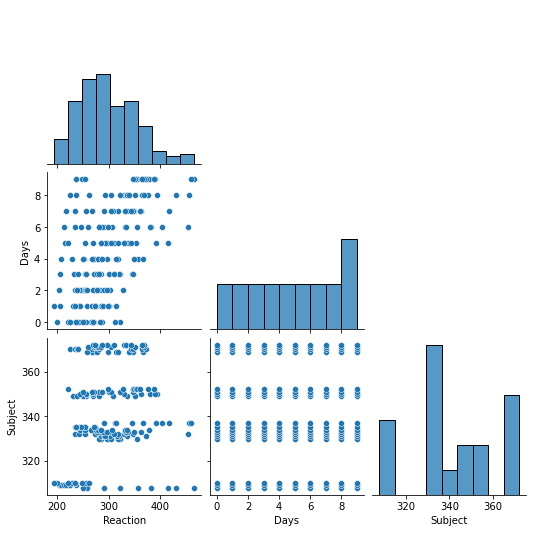

In [111]:
sns.pairplot(sleep, corner = True)
plt.show

In [112]:
corr, p = stats.pearsonr(sleep.Reaction, sleep.Days)
corr, p

(0.5352302262650254, 9.89409632221453e-15)

#### Chi Square Exercises

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                            Codeup Student	Not Codeup Student
           Uses a Macbook	            49	                20
        
    Doesn't Use A Macbook	             1	                30


- $H_0$ is always that there is no association between the groups (they are independent)

- $H_a$ is that there is an association (they are not independent) between the groups

In [163]:
index = ['Uses a Macbook', 'Doesn\'t Use a Macbook']
columns = ['CodeUp Student', 'Not a CodeUp Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.345, .345], [.155, .155]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

alpha = 0.05

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('degrees of freedom = ', degrees_of_freedom)

Observed
                       CodeUp Student  Not a CodeUp Student
Uses a Macbook                     49                    20
Doesn't Use a Macbook               1                    30
---
Expected
                       CodeUp Student  Not a CodeUp Student
Uses a Macbook                   34.5                  34.5
Doesn't Use a Macbook            15.5                  15.5
---

chi^2 = 39.3174
p     = 0.0000
degrees of freedom =  1


In [165]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


Choose another 2 categorical variables from the mpg dataset and perform a Chi$^2$
 contingency table test with them. Be sure to state your null and alternative hypotheses.



In [166]:
mpg = data('mpg')
mpg.head(2).T

,1,2
manufacturer,audi,audi
model,a4,a4
displ,1.8,1.8
year,1999,1999
cyl,4,4
trans,auto(l5),manual(m5)
drv,f,f
cty,18,21
hwy,29,29
fl,p,p


- $H_0$ is always that there is no association between the groups (they are independent)

- $H_a$ is that there is an association (they are not independent) between the groups

In [174]:
mpg.manufacturer.value_counts(), mpg['class'].value_counts()

(dodge         37
 toyota        34
 volkswagen    27
 ford          25
 chevrolet     19
 audi          18
 hyundai       14
 subaru        14
 nissan        13
 honda          9
 jeep           8
 pontiac        5
 land rover     4
 mercury        4
 lincoln        3
 Name: manufacturer, dtype: int64,
 suv           62
 compact       47
 midsize       41
 subcompact    35
 pickup        33
 minivan       11
 2seater        5
 Name: class, dtype: int64)

In [175]:
observed = pd.crosstab(mpg.manufacturer, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [176]:
alpha = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [177]:
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('degrees of freedom = ', degrees_of_freedom)

Observed
class         2seater  compact  midsize  minivan  pickup  subcompact  suv
manufacturer                                                             
audi                0       15        3        0       0           0    0
chevrolet           5        0        5        0       0           0    9
dodge               0        0        0       11      19           0    7
ford                0        0        0        0       7           9    9
honda               0        0        0        0       0           9    0
hyundai             0        0        7        0       0           7    0
jeep                0        0        0        0       0           0    8
land rover          0        0        0        0       0           0    4
lincoln             0        0        0        0       0           0    3
mercury             0        0        0        0       0           0    4
nissan              0        2        7        0       0           0    4
pontiac             0        

In [178]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

We reject the null hypothesis


Use the data from the employees database to answer these questions:

 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [195]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    

url = get_db_url('employees')
sql = """
SELECT employees.emp_no, employees.gender, dept_emp.dept_no, departments.dept_name
FROM employees
JOIN dept_emp ON employees.emp_no = dept_emp.emp_no
JOIN departments ON dept_emp.dept_no = departments.dept_no
WHERE dept_emp.to_date > curdate() AND (departments.dept_name = 'Sales' or departments.dept_name = 'Marketing');
"""

In [196]:
employees = pd.read_sql(sql, url)
employees.head()

,emp_no,gender,dept_no,dept_name
0,10017,F,d001,Marketing
1,10058,M,d001,Marketing
2,10140,F,d001,Marketing
3,10228,F,d001,Marketing
4,10239,F,d001,Marketing


In [197]:
employees.gender.value_counts(), employees.dept_name.value_counts()

(M    31680
 F    20863
 Name: gender, dtype: int64,
 Sales        37701
 Marketing    14842
 Name: dept_name, dtype: int64)

- $H_0$ is always that there is no association between the groups (they are independent)

- $H_a$ is that there is an association (they are not independent) between the groups

In [198]:
observed = pd.crosstab(employees.gender, employees.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [199]:
alpha = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [200]:
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('degrees of freedom = ', degrees_of_freedom)

Observed
dept_name  Marketing  Sales
gender                     
F               5864  14999
M               8978  22702
---
Expected
[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692
degrees of freedom =  1


In [201]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


 - Is an employee's gender independent of whether or not they are or have been a manager?

In [223]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    

url = get_db_url('employees')
sql = """
SELECT employees.gender, dept_manager.dept_no
FROM employees
LEFT JOIN dept_manager ON employees.emp_no = dept_manager.emp_no;
"""

In [225]:
managers = pd.read_sql(sql, url)
managers.fillna(0, inplace = True)
managers.head()

,gender,dept_no
0,M,0
1,F,0
2,M,0
3,M,0
4,M,0


In [226]:
managers['is_manager'] = np.where(managers.dept_no == 0, 0, 1)

In [227]:
managers.head()

,gender,dept_no,is_manager
0,M,0,0
1,F,0,0
2,M,0,0
3,M,0,0
4,M,0,0


In [228]:
managers.is_manager.value_counts()

0    300000
1        24
Name: is_manager, dtype: int64

- $H_0$ is always that there is no association between the groups (they are independent)

- $H_a$ is that there is an association (they are not independent) between the groups

In [229]:
observed = pd.crosstab(managers.gender, managers.is_manager)
observed

is_manager,0,1
gender,,
F,120038,13
M,179962,11


In [230]:
alpha = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [231]:
print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('degrees of freedom = ', degrees_of_freedom)

Observed
is_manager       0   1
gender                
F           120038  13
M           179962  11
---
Expected
[[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]
---

chi^2 = 1.4567
p     = 0.2275
degrees of freedom =  1


In [232]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis
